In [23]:
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt

## Loading data

In [20]:
# loading data
file_name = 'breast-cancer-wisconsin.csv'
column_names = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']
data = pd.read_csv(file_name, header=None, names=column_names)

# 1. Pre-process

## Checking for missing values, data types

Observation: full data frame, no missing elements, all features are catagorical <br>
Looks like 'Bare Nuclei' has non-numerical datatype, need to look into that

In [95]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [97]:
data.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [53]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [121]:
data['Bare Nuclei']= pd.to_numeric(data['Bare Nuclei'], errors='coerce',downcast='signed')

/home/ying/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
data.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                     int8
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [124]:
data = data.dropna()

## check for the balance of the output

In [60]:
np.unique(data.Class)

array([2, 4])

In [68]:
print(str(sum(data.Class == 2)) + ' of Class = 2' )
print(str(sum(data.Class == 4)) + ' of Class = 4' )

458 of Class = 2
241 of Class = 4


## Visualize each feature in relation of output

Observation: <br>
1. The distribution of features are not Gaussian
2. Some features are highly correlated, such as 'Cell size', 'Cell Shape' and 'Marginal Adhsion'

/home/ying/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """
/home/ying/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/ying/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


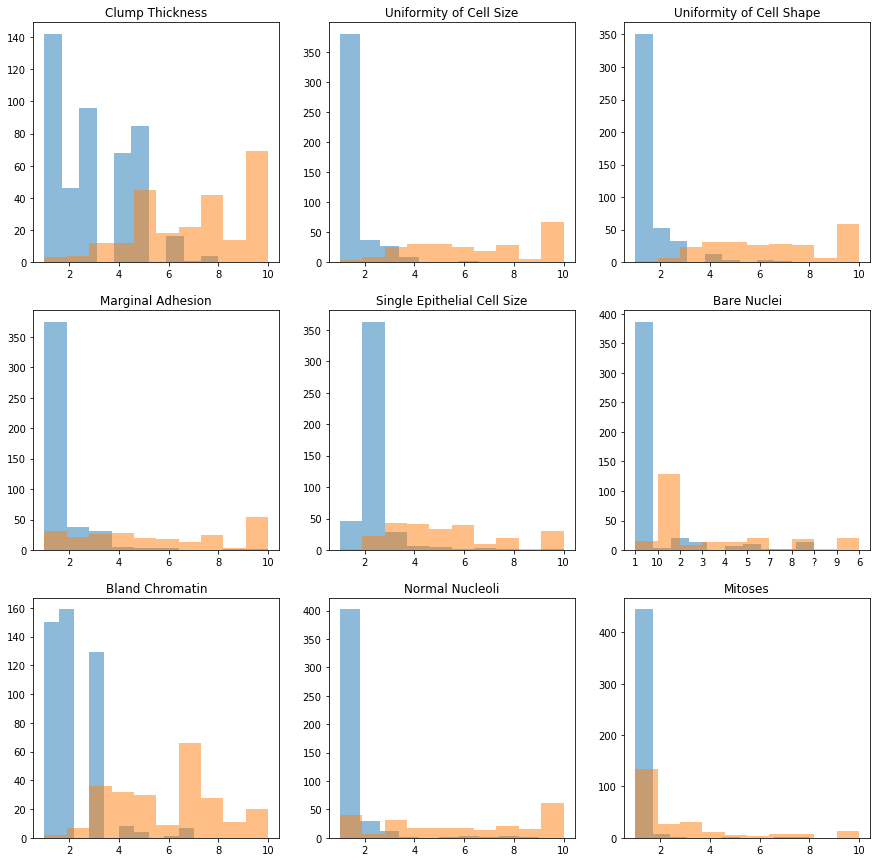

In [74]:
fig, ax = plt.subplots(3,3, figsize = (15,15))
for i in range(3):
    for j in range(3):
        ax[i,j].hist(data.loc[data['Class']==2].iloc[:,i*3+j], alpha = 0.5)
        plt.hold(True)
        ax[i,j].hist(data.loc[data['Class']==4].iloc[:,i*3+j], alpha = 0.5)
        ax[i,j].title.set_text(data.keys()[i*3+j])
plt.show()

## Check the correlation of features

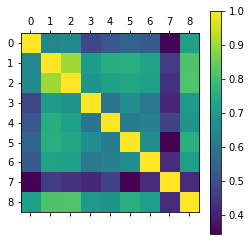

In [84]:
import matplotlib.pyplot as plt

plt.matshow(data.iloc[:,:].corr())
plt.colorbar()

# 2. Construct a model

Accuracy was not a good choice because the data is unbalanced, therefore I use roc_auc to choose for the best parameter for KNN.<br>
Recall was used as meteric to evaluate how well the model differentiate classes, because we want to minimize the false-negative situation when diagnosing cancer. 

### Spliting training and testing data set

In [239]:
X = data.iloc[:,:9]
y = data.iloc[:,9]==2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### KNN model

In [240]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_neighbors = np.linspace(100, 300, 21).astype(int)
param_grid = {'n_neighbors':  n_neighbors}
grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, return_train_score=True, scoring='roc_auc', cv=5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.997
best parameters: {'n_neighbors': 250}
test-set score: 0.992


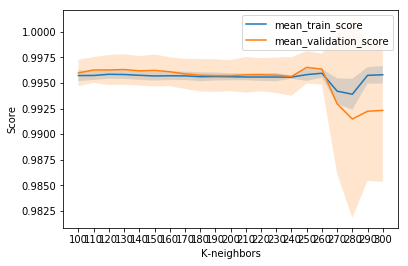

In [241]:
results = pd.DataFrame(grid.cv_results_)
plt.plot(results.param_n_neighbors.astype(float), results['mean_train_score'])
plt.plot(results.param_n_neighbors.astype(float), results['mean_test_score'])
plt.fill_between(results.param_n_neighbors.astype(float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.xticks(results.param_n_neighbors.astype(float),n_neighbors)
plt.xlabel('K-neighbors')
plt.ylabel('Score')
plt.legend({'mean_train_score','mean_validation_score'})
plt.show()

### Summary: with 5-fold cross-validation, I found n_neighbors = 250 is the best parameter for training data. 

## retrain the model with the best parameter, n_neighbors =250

In [242]:
knn = KNeighborsClassifier(n_neighbors=250)
knn.fit(X_train, y_train)
print('accuracy for testing:'+str(round(knn.score(X_test,y_test),3)))

accuracy for testing:0.895


## Visualize confusion matrix

In [243]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn.predict(X_test))


In [245]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 47  17]
 [  1 106]]


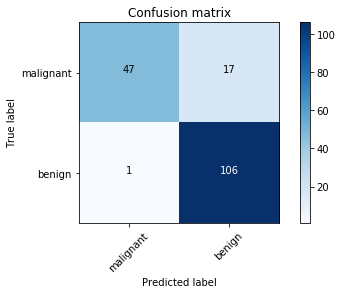

In [246]:
classes = {'benign', 'malignant'}
plot_confusion_matrix(cm, classes)

## In here, a Knn classifier was used to predict the type of tumor. 
However, false negative (type II error) is a much more hazardous on patients outcome than false positive in diagnosis. Futher model/ exploration should be focused on decreasing false nagative rate.  

# Random Forest


In [247]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Confusion matrix, without normalization
[[ 57   7]
 [  4 103]]


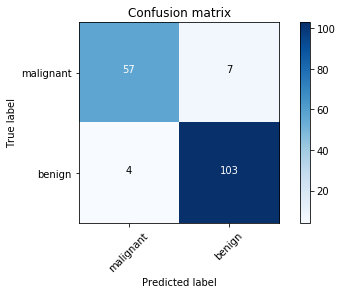

In [249]:
cm = confusion_matrix(y_test, rfc.predict(X_test))
classes = {'benign', 'malignant'}
plot_confusion_matrix(cm, classes)

## to maximize recall, random forest has better performance than Knn